## Task 7.1.1: Rectangular Features

* Implement the construction of all 2-rect features (horizontal and vertical) within a given window (like the 24x24 px window from the paper)
* How many exist? **(RESULT)**
* Display three of these overlaid onto an image of a face. **(RESULT)**

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, transform as sktransform
from tqdm.notebook import tqdm

# In case you don't have scikit-image installed, uncomment the following line:
!pip install scikit-image

#Build Rectangular Features

In [3]:
# TODO: Implement here
class RectangularFeatures:
  def __init__(self, x,y,w,h, ftype):
    self.feature_type=ftype
    self.x=x
    self.y=y
    self.w=w
    self.h=h

  def draw_feature(self, ax):
    x =self.x
    y= self.y
    w=self.w
    h=self.h
    if self.feature_type == 'Two Rect horizontal': # I would have extended it to include all feature types but since only 2 rect features are required to be drawn, only these are supported
      w_half = w // 2

      ax.add_patch(plt.Rectangle((x, y), w_half, h, facecolor='white', edgecolor='green'))

      ax.add_patch(plt.Rectangle((x + w_half, y), w_half, h, facecolor='black', edgecolor='green'))
    elif self.feature_type == 'Two Rect vertical':
      h_half = h // 2

      ax.add_patch(plt.Rectangle((x, y), w, h_half, facecolor='white', edgecolor='green'))

      ax.add_patch(plt.Rectangle((x, y+h_half), w, h_half, facecolor='black', edgecolor='green'))

  def checkintegral(self, ii, y,x):
    if y>=0 and x>=0:
      return ii[y][x]
    else:
      return 0

  def compute_feature_value(self,integral_img): # since this will be used by the weak classifier, i supported all kinds of features
    w, h= self.w, self.h
    x, y=self.x, self.y
    if self.feature_type == 'Two Rect horizontal':
      onerect = self.checkintegral(integral_img, y + h - 1, x + w//2 - 1) - self.checkintegral(integral_img, y + h - 1, x - 1) - self.checkintegral(integral_img, y - 1, x + w//2 - 1) + self.checkintegral(integral_img, y - 1, x - 1)
      secondrect = self.checkintegral(integral_img, y + h - 1, x + w - 1) - self.checkintegral(integral_img, y + h - 1, x + w//2 - 1) - self.checkintegral(integral_img, y - 1, x + w - 1) + self.checkintegral(integral_img, y - 1, x + w//2 - 1)
      return onerect - secondrect
    elif self.feature_type == 'Two Rect vertical':
      onerect= self.checkintegral(integral_img, y+(h//2)-1, x+w-1)- self.checkintegral(integral_img, y+(h//2)-1, x-1)- self.checkintegral(integral_img, y-1, x+w-1)+ self.checkintegral(integral_img, y-1, x-1)
      secondrect= self.checkintegral(integral_img, y+h-1,x+w-1)- self.checkintegral(integral_img, y+h-1, x-1)  - self.checkintegral(integral_img, y+(h//2)-1, x+w-1) + self.checkintegral(integral_img,y+(h//2)-1,x-1)
      return onerect-secondrect
    elif self.feature_type == 'Three Rect horizontal':
      onerect=self.checkintegral(integral_img,y+h-1, x+(w//3)-1)- self.checkintegral(integral_img, y+h-1, x-1) -self.checkintegral(integral_img, y-1,x+(w//3)-1)+self.checkintegral(integral_img, y-1, x-1)
      secondrect=self.checkintegral(integral_img,y+h-1,x+(2*w//3)-1)-self.checkintegral(integral_img,y+h-1,x+(w//3)-1) - self.checkintegral(integral_img,y-1,x+(2*w//3)-1) + self.checkintegral(integral_img, y-1,x+(w//3)-1)
      thirdrect=self.checkintegral(integral_img, y+h-1, x+w-1)- self.checkintegral(integral_img, y+h-1, x+(2*w//3)-1) -self.checkintegral(integral_img, y-1, x+w-1)+ self.checkintegral(integral_img, y-1,x+(2*w//3)-1)
      return secondrect-thirdrect-onerect
    elif self.feature_type == 'Three Rect vertical':
      onerect=self.checkintegral(integral_img, y+(h//3)-1, x+w-1)- self.checkintegral(integral_img, y+(h//3)-1,x-1) -self.checkintegral(integral_img, y-1, x+w-1) +self.checkintegral(integral_img, y-1, x-1)
      secondrect= self.checkintegral(integral_img, y+(2*h//3)-1, x+w-1) - self.checkintegral(integral_img,y+(2*h//3)-1, x-1) - self.checkintegral(integral_img, y+(h//3)-1, x+w-1)+self.checkintegral(integral_img, y+(h//3)-1,x-1)
      thirdrect=self.checkintegral(integral_img, y+h-1, x+w-1)- self.checkintegral(integral_img, y+h-1, x-1)  - self.checkintegral(integral_img, y+(2*h//3)-1, x+w-1) + self.checkintegral(integral_img, y+(2*h//3)-1, x-1)
      return secondrect-thirdrect-onerect
    else:
      onerect=self.checkintegral(integral_img, y+(h//2)-1, x+(w//2)-1)- self.checkintegral(integral_img, y+(h//2)-1, x-1)-self.checkintegral(integral_img, y-1, x+(w//2)-1)+ self.checkintegral(integral_img, y-1,x-1)
      secondrect= self.checkintegral(integral_img, y+(h//2)-1, x+w-1)- self.checkintegral(integral_img, y+(h//2)-1, x+(w//2)-1) -self.checkintegral(integral_img, y-1, x+w-1)+ self.checkintegral(integral_img, y-1, x+(w//2)-1)
      thirdrect=self.checkintegral(integral_img, y+h-1, x+(w//2)-1)- self.checkintegral(integral_img,y+h-1, x-1)  - self.checkintegral(integral_img, y+(h//2)-1, x+(w//2)-1) +self.checkintegral(integral_img, y+(h//2)-1, x-1)
      fourthrect=self.checkintegral(integral_img, y+h-1, x+w-1)- self.checkintegral(integral_img, y+h-1, x+(w//2)-1)  - self.checkintegral(integral_img, y+(h//2)-1, x+w-1) + self.checkintegral(integral_img, y+(h//2)-1, x+(w//2)-1)
      return onerect+fourthrect-secondrect-thirdrect




In [4]:
def rectfeatures(window):
  s1, s2=window
  horizontal2rect =[]
  vertical2rect = []

  height=np.arange(1,s2+1)
  width=np.arange(1,s1+1)


  for w in width:
    for h in height:
      for y in range(s2):
        for x in range(s1):
          if x+(w*2)<=s1 and y+h<=s2:
            horizontal2rect.append(RectangularFeatures(x,y,w*2, h, "Two Rect horizontal"))

  for w in width:
    for h in height:
      for y in range(s2):
        for x in range(s1):
          if x+(w)<=s1 and y+(h*2)<=s2:
            vertical2rect.append(RectangularFeatures( x,y,w, h*2, "Two Rect vertical"))
  return horizontal2rect, vertical2rect

# Test and overlay on a face image

43200  horizontal 2 rect features
43200 vertical 2 rect features
Total 2 rect features 86400


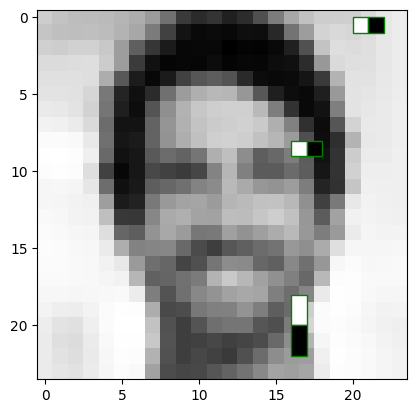

In [5]:
fig, ax = plt.subplots()
img= io.imread('/content/TestImg.jpeg')
img = color.rgb2gray(img)
img_resized = sktransform.resize(img, (24, 24))
ax.imshow(img_resized, cmap='gray')

horizontal2rect, vertical2rect = rectfeatures((24,24))
print(len(horizontal2rect), " horizontal 2 rect features")
print(len(vertical2rect), "vertical 2 rect features")
print("Total 2 rect features",len(vertical2rect)+ len(horizontal2rect))



horizontal2rect[200].draw_feature(ax)
vertical2rect[1000].draw_feature(ax)
horizontal2rect[20].draw_feature(ax)


There are 86400 2-rect features in a 24*24 window

## Task 7.1.2: Integral Image

* Implement a function that computes the integral image of a given input image. Display the integral image for an input of you choice **(RESULT)**.
* Compare it to the output of skimage's integral_image() function. **(RESULT)**

In [6]:
def integral_img(img):

  integralimg=np.zeros(img.shape)
  for i in range(img.shape[0]):
    temp=0
    for j in range(img.shape[1]):
      temp+=img[i][j]
      res=temp
      if i-1>=0:
        res=temp+integralimg[i-1][j]
      integralimg[i][j]=res
  return integralimg

# create and display the integral image of the test image using our custom function

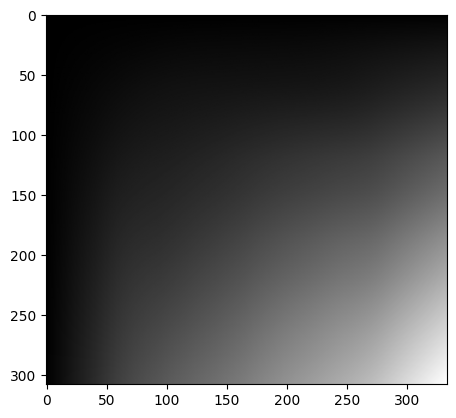

In [7]:
img= io.imread('/content/TestImg.jpeg')
img = color.rgb2gray(img)
my_ii=integral_img(img)

fig, ax = plt.subplots()
ax.imshow(my_ii, cmap='gray')

# Comparing it with skimage integral image function

In [8]:
from skimage.transform import integral_image

img = io.imread('/content/TestImg.jpeg')
img_gray = color.rgb2gray(img)
ii = integral_image(img_gray)

print(f"Match: {np.allclose(ii, my_ii)}")

Match: True


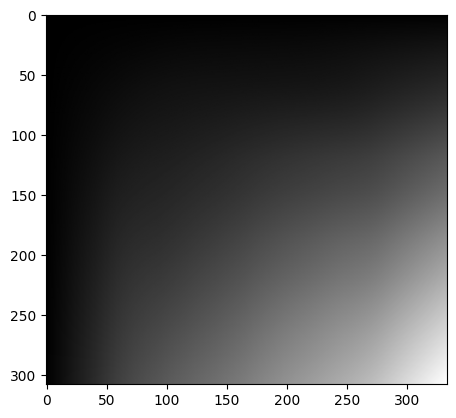

In [9]:
fig, ax = plt.subplots()
ax.imshow(ii, cmap='gray')

We can see that our implementation and skimage implementation yield the same results where both images are almost exact and both arrays have same values within numeric precision.

## Task 7.1.3: One Weak Classifier

* Implement a weak classifier that uses a single rectangular feature to classify an image as face/non-face. The classifier should take as input the integral image, the feature type, position, size, and threshold. It should output 1 for face, and 0 for non-face predictions. **(RESULT)**
* Test your weak classifier on an example image of your choice. **(RESULT)**

Suggestion: Use one cifar image as non-face and one tinyface image as face.

In [10]:
# Get TinyFace using for example gdown
!pip install gdown
!gdown 1xTZc7lNmWN33ECO2AKH6FycGdiqIK7W0
!unzip tinyface.zip
!rm tinyface.zip

Streaming output truncated to the last 5000 lines.
  inflating: tinyface/Testing_Set/Gallery_Distractor/60_8_Election_Campain_Election_Campaign_8_148_face10.jpg  
  inflating: tinyface/Testing_Set/Gallery_Distractor/60_8_Election_Campain_Election_Campaign_8_244_face15.jpg  
  inflating: tinyface/Testing_Set/Gallery_Distractor/60_8_Election_Campain_Election_Campaign_8_412_face213.jpg  
  inflating: tinyface/Testing_Set/Gallery_Distractor/60_8_Election_Campain_Election_Campaign_8_412_face211.jpg  
  inflating: tinyface/Testing_Set/Gallery_Distractor/60_8_Election_Campain_Election_Campaign_8_412_face202.jpg  
  inflating: tinyface/Testing_Set/Gallery_Distractor/60_8_Election_Campain_Election_Campaign_8_412_face201.jpg  
  inflating: tinyface/Testing_Set/Gallery_Distractor/60_8_Election_Campain_Election_Campaign_8_412_face200.jpg  
  inflating: tinyface/Testing_Set/Gallery_Distractor/60_8_Election_Campain_Election_Campaign_8_412_face199.jpg  
  inflating: tinyface/Testing_Set/Gallery_Distr

In [11]:
# Prepare tinyface data
import os
import shutil
import torch
import torchvision
from torchvision import transforms
from PIL import Image
from torch.utils.data import Dataset, DataLoader

def move_files_to_parent(parent_dir):
    for root, dirs, files in os.walk(parent_dir, topdown=False):
        # Move files in subdirectories to the parent directory
        for file in files:
            src = os.path.join(root, file)
            dst = os.path.join(parent_dir, file)
            shutil.move(src, dst)

        # Remove empty subdirectories
        for directory in dirs:
            subdir = os.path.join(root, directory)
            if not os.listdir(subdir):  # Check if the directory is empty
                os.rmdir(subdir)

path = 'tinyface/Training_Set/'
move_files_to_parent(path)

In [12]:
class TinyFace(Dataset):
    def __init__(self, img_dir, transform=None):
        """
        Args:
            image_dir (str): Path to the directory with all images.
            transform (callable, optional): Optional transform to apply to the images.
        """
        self.image_dir = img_dir
        self.image_filenames = [
            f for f in os.listdir(img_dir) if os.path.isfile(os.path.join(img_dir, f))
        ]
        self.transform = transform

    def __len__(self):
        return len(self.image_filenames)

    def __getitem__(self, idx):
        """
        Args:
            idx (int): Index of the image to retrieve.

        Returns:
            image: Transformed image.
            label: Label (optional, could be derived from filenames if needed).
        """
        img_path = os.path.join(self.image_dir, self.image_filenames[idx])
        image = Image.open(img_path).convert("RGB")  # Ensure 3-channel RGB
        if self.transform:
            image = self.transform(image)
        label = 1
        return (image, label)

# Define the transforms for preprocessing
transform = transforms.Compose([
    transforms.Resize((24, 24)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
])

# Create the dataset
tinyface_dataset = TinyFace(img_dir='tinyface/Training_Set', transform=transform)

# Access a single sample
imageface, label = tinyface_dataset[0]
print(f"Image shape: {imageface.shape}, Label: {label}")
print(len(tinyface_dataset))

Image shape: torch.Size([1, 24, 24]), Label: 1
7804


In [13]:
# Face Data samples done
# Now loading CIFAR-10 dataset as non-face data and prepping it similarly

In [14]:
# Load CIFAR-10 dataset as non-face data

import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.Resize((24, 24)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

cifar10_train = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

cifar10_test = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

# Setting all targets to 0 (non-face)
cifar10_train.targets = [0] * len(cifar10_train)
cifar10_test.targets = [0] * len(cifar10_test)

# Access samples
imagecifar, label = cifar10_train[1]
print(f"Image shape: {imagecifar.shape}, Label: {label}")

100%|██████████| 170M/170M [00:10<00:00, 15.8MB/s]


Image shape: torch.Size([1, 24, 24]), Label: 0


#Building Classifier

In [15]:
class weakClassifier:

  def __init__(self, feature_type,position,size, threshold, polarity=1):
    x,y=position
    w,h=size
    self.feature = RectangularFeatures(x,y,w,h, feature_type)
    self.threshold=threshold
    self.polarity=polarity



  def predict(self, integral_img):

    if self.polarity * self.feature.compute_feature_value(integral_img) < self.polarity* self.threshold:
      return 1
    else:
      return 0




# **Cifar Image**

# Testing on vertical 2 rectangular feature

In [16]:
feature=vertical2rect[6555]
x,y,w,h,feature_type=feature.x,feature.y,feature.w,feature.h,feature.feature_type
img= integral_img(imagecifar.squeeze(0))
myclassifier= weakClassifier(feature_type, (x,y),(w,h), 0)
pred= myclassifier.predict(img)
print(pred)

0


# Testing on 4 rectangular feature

In [17]:
myclassifier= weakClassifier('Four Rect', (6, 19), (6, 2), 0)
pred= myclassifier.predict(img)
print(pred)

0


# **Face Image**

# Testing on vertical 2 rectangular feature

In [18]:
feature=vertical2rect[6555]
x,y,w,h,feature_type=feature.x,feature.y,feature.w,feature.h,feature.feature_type
img= integral_img(imageface.squeeze(0))
myclassifier= weakClassifier(feature_type, (x,y),(w,h), 0)
pred= myclassifier.predict(img)
print(pred)

1


# Testing on 4 rectangular feature

In [19]:
myclassifier= weakClassifier('Four Rect', (6, 19), (6, 2), 0)
pred= myclassifier.predict(img)
print(pred)

1


# Here I was making sure my implementation for computing the feature value is correct

Tested some more but here is a glimpse

In [20]:
from skimage.feature import haar_like_feature, haar_like_feature_coord
img = imagecifar.squeeze(0)
img = integral_img(img)

coords, ftypes = haar_like_feature_coord(
    img.shape[0],
    img.shape[1],
    feature_type=['type-3-x']
)

values = haar_like_feature(
    img,
    0, 0,
    img.shape[0], img.shape[1],
    feature_type=ftypes,
    feature_coord=coords
)

print("skimage Haar value:", values[20000])

feature= RectangularFeatures(9,11, 6,7, 'Three Rect horizontal')
print("My vlaue", feature.compute_feature_value(img))


skimage Haar value: -6.533339262008667
My vlaue -6.533339262008667


## Task 7.1.4: AdaBoosting (BONUS)

* Implement the AdaBoost algorithm as outlined in the paper (https://www.face-rec.org/algorithms/Boosting-Ensemble/16981346.pdf).
* Train a 20-feature classifier using these datasets:
    - TinyFace for low resolution face images: https://qmul-tinyface.github.io/
    - CIFAR10 for negative samples: https://www.cs.toronto.edu/~kriz/cifar.html
* Test your classifier and report the results for different thresholds **(RESULTS)**

Suggestion: Use torch.utils.data.ConcatDataset to finalize the dataset. If you are more comfortable with numpy or another framework feel free to convert the data accordingly. <br><br>
Example conversion from torch.tensor to numpy: `numpy_array = tensor.numpy()`

In [21]:
# First TODO: Combine datasets into one training and one test set
# Suggested: use torch.utils.data.ConcatDataset

In [22]:
# TODO: Implement here

## Congratz, you made it! :)